<a href="https://colab.research.google.com/github/navya-25/deep_learning_fashion_mnist/blob/main/DL_project(fashion_mnist_dataset_classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import keras# to build neural networks
import tensorflow as tf #https://github.com/VictorOwinoKe/CNN-Image-classification-Using-Fashion-MNIST-dataset/blob/master/CNN%20Image%20classifocationn%20python%20%20Notebook.ipynb
#https://github.com/JatinSadhwani02/Fashion-Products-Classification-using-CNN/blob/master/Untitled32.ipynb

Dataset Label Description

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data() # load dataset from  keras

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
!apt-get install swig cmake libopenmpi-dev zlib1g-dev xvfb x11-utils ghostscript ffmpeg -qq #remove -qq for full output
!pip install pyvirtualdisplay ghostscript

Selecting previously unselected package fonts-droid-fallback.
(Reading database ... 122352 files and directories currently installed.)
Preparing to unpack .../00-fonts-droid-fallback_1%3a6.0.1r16-1.1_all.deb ...
Unpacking fonts-droid-fallback (1:6.0.1r16-1.1) ...
Selecting previously unselected package poppler-data.
Preparing to unpack .../01-poppler-data_0.4.9-2_all.deb ...
Unpacking poppler-data (0.4.9-2) ...
Selecting previously unselected package fonts-noto-mono.
Preparing to unpack .../02-fonts-noto-mono_20200323-1build1~ubuntu20.04.1_all.deb ...
Unpacking fonts-noto-mono (20200323-1build1~ubuntu20.04.1) ...
Selecting previously unselected package fonts-urw-base35.
Preparing to unpack .../03-fonts-urw-base35_20170801.1-3_all.deb ...
Unpacking fonts-urw-base35 (20170801.1-3) ...
Selecting previously unselected package libgs9-common.
Preparing to unpack .../04-libgs9-common_9.50~dfsg-5ubuntu4.7_all.deb ...
Unpacking libgs9-common (9.50~dfsg-5ubuntu4.7) ...
Selecting previously unsel

In [ ]:
# Print shape of Data

X_train.shape, y_train.shape, "******", X_test.shape, y_test.shape

((60000, 28, 28), (60000,), '******', (10000, 28, 28), (10000,))

In [ ]:
X_train[0] # image data in 2d numpy array shape 28x28 pixel

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0] #9 => Ankle boot

9

In [ ]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

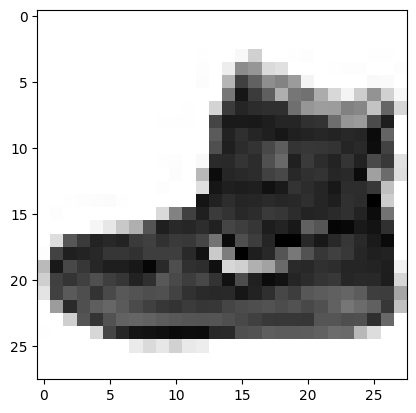

In [ ]:
plt.imshow(X_train[0], cmap='Greys')

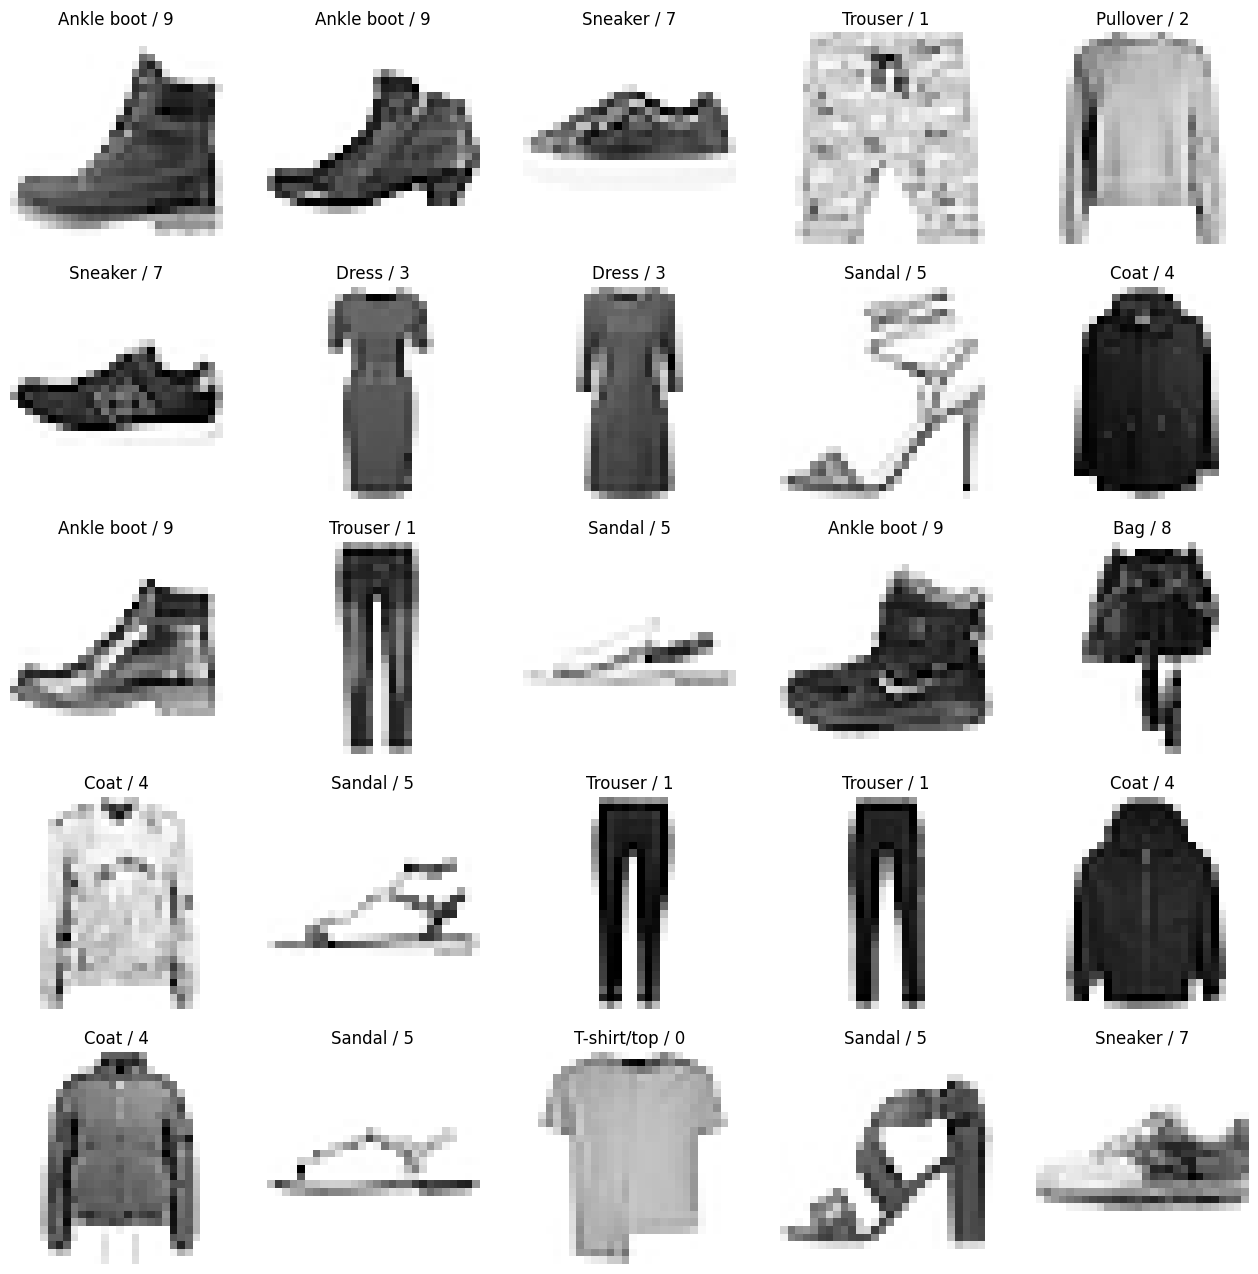

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j)
  j+=1
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train.ndim

3

In [ ]:
# expected conv2d_input to have 4 dimensions, but got array with shape (28, 28, 1)
# so we have increase the dimention 3 to 4
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# ref: https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html

In [ ]:
X_train.ndim

4

In [ ]:
X_train = X_train/255
X_test = X_test/255#Feature Scaling

In [ ]:
from sklearn.model_selection import train_test_split #split dataset
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)

In [ ]:
X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

In [ ]:
#Building CNN model
cnn_model = keras.models.Sequential([
                         tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                         tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                         tf.keras.layers.Flatten(),
                         tf.keras.layers.Dense(units=128, activation='relu'),
                         tf.keras.layers.Dropout(0.25),
                         tf.keras.layers.Dense(units=256, activation='relu'),
                         tf.keras.layers.Dropout(0.25),
                         tf.keras.layers.Dense(units=128, activation='relu'),
                         tf.keras.layers.Dense(units=10, activation='softmax')
                         ])

In [ ]:
# complie the model
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the Model
cnn_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/20
3000/3000 [==============================] - 57s 18ms/step - loss: 0.5553 - accuracy: 0.7939 - val_loss: 0.3855 - val_accuracy: 0.8584
Epoch 2/20
3000/3000 [==============================] - 64s 21ms/step - loss: 0.3665 - accuracy: 0.8648 - val_loss: 0.3178 - val_accuracy: 0.8827
Epoch 3/20
3000/3000 [==============================] - 52s 17ms/step - loss: 0.3192 - accuracy: 0.8842 - val_loss: 0.3187 - val_accuracy: 0.8826
Epoch 4/20
3000/3000 [==============================] - 51s 17ms/step - loss: 0.2919 - accuracy: 0.8925 - val_loss: 0.2972 - val_accuracy: 0.8923
Epoch 5/20
3000/3000 [==============================] - 60s 20ms/step - loss: 0.2730 - accuracy: 0.9006 - val_loss: 0.2923 - val_accuracy: 0.8919
Epoch 6/20
3000/3000 [==============================] - 53s 18ms/step - loss: 0.2592 - accuracy: 0.9034 - val_loss: 0.2967 - val_accuracy: 0.8938
Epoch 7/20
3000/3000 [==============================] - 69s 23ms/step - loss: 0.2466 - accuracy: 0.9089 - val_loss: 0.3060 -

In [ ]:
y_pred = cnn_model.predict(X_test)#Test the Model

313/313 [==============================] - 3s 8ms/step


In [ ]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.3231 - accuracy: 0.9064


[0.32314640283584595, 0.9064000248908997]

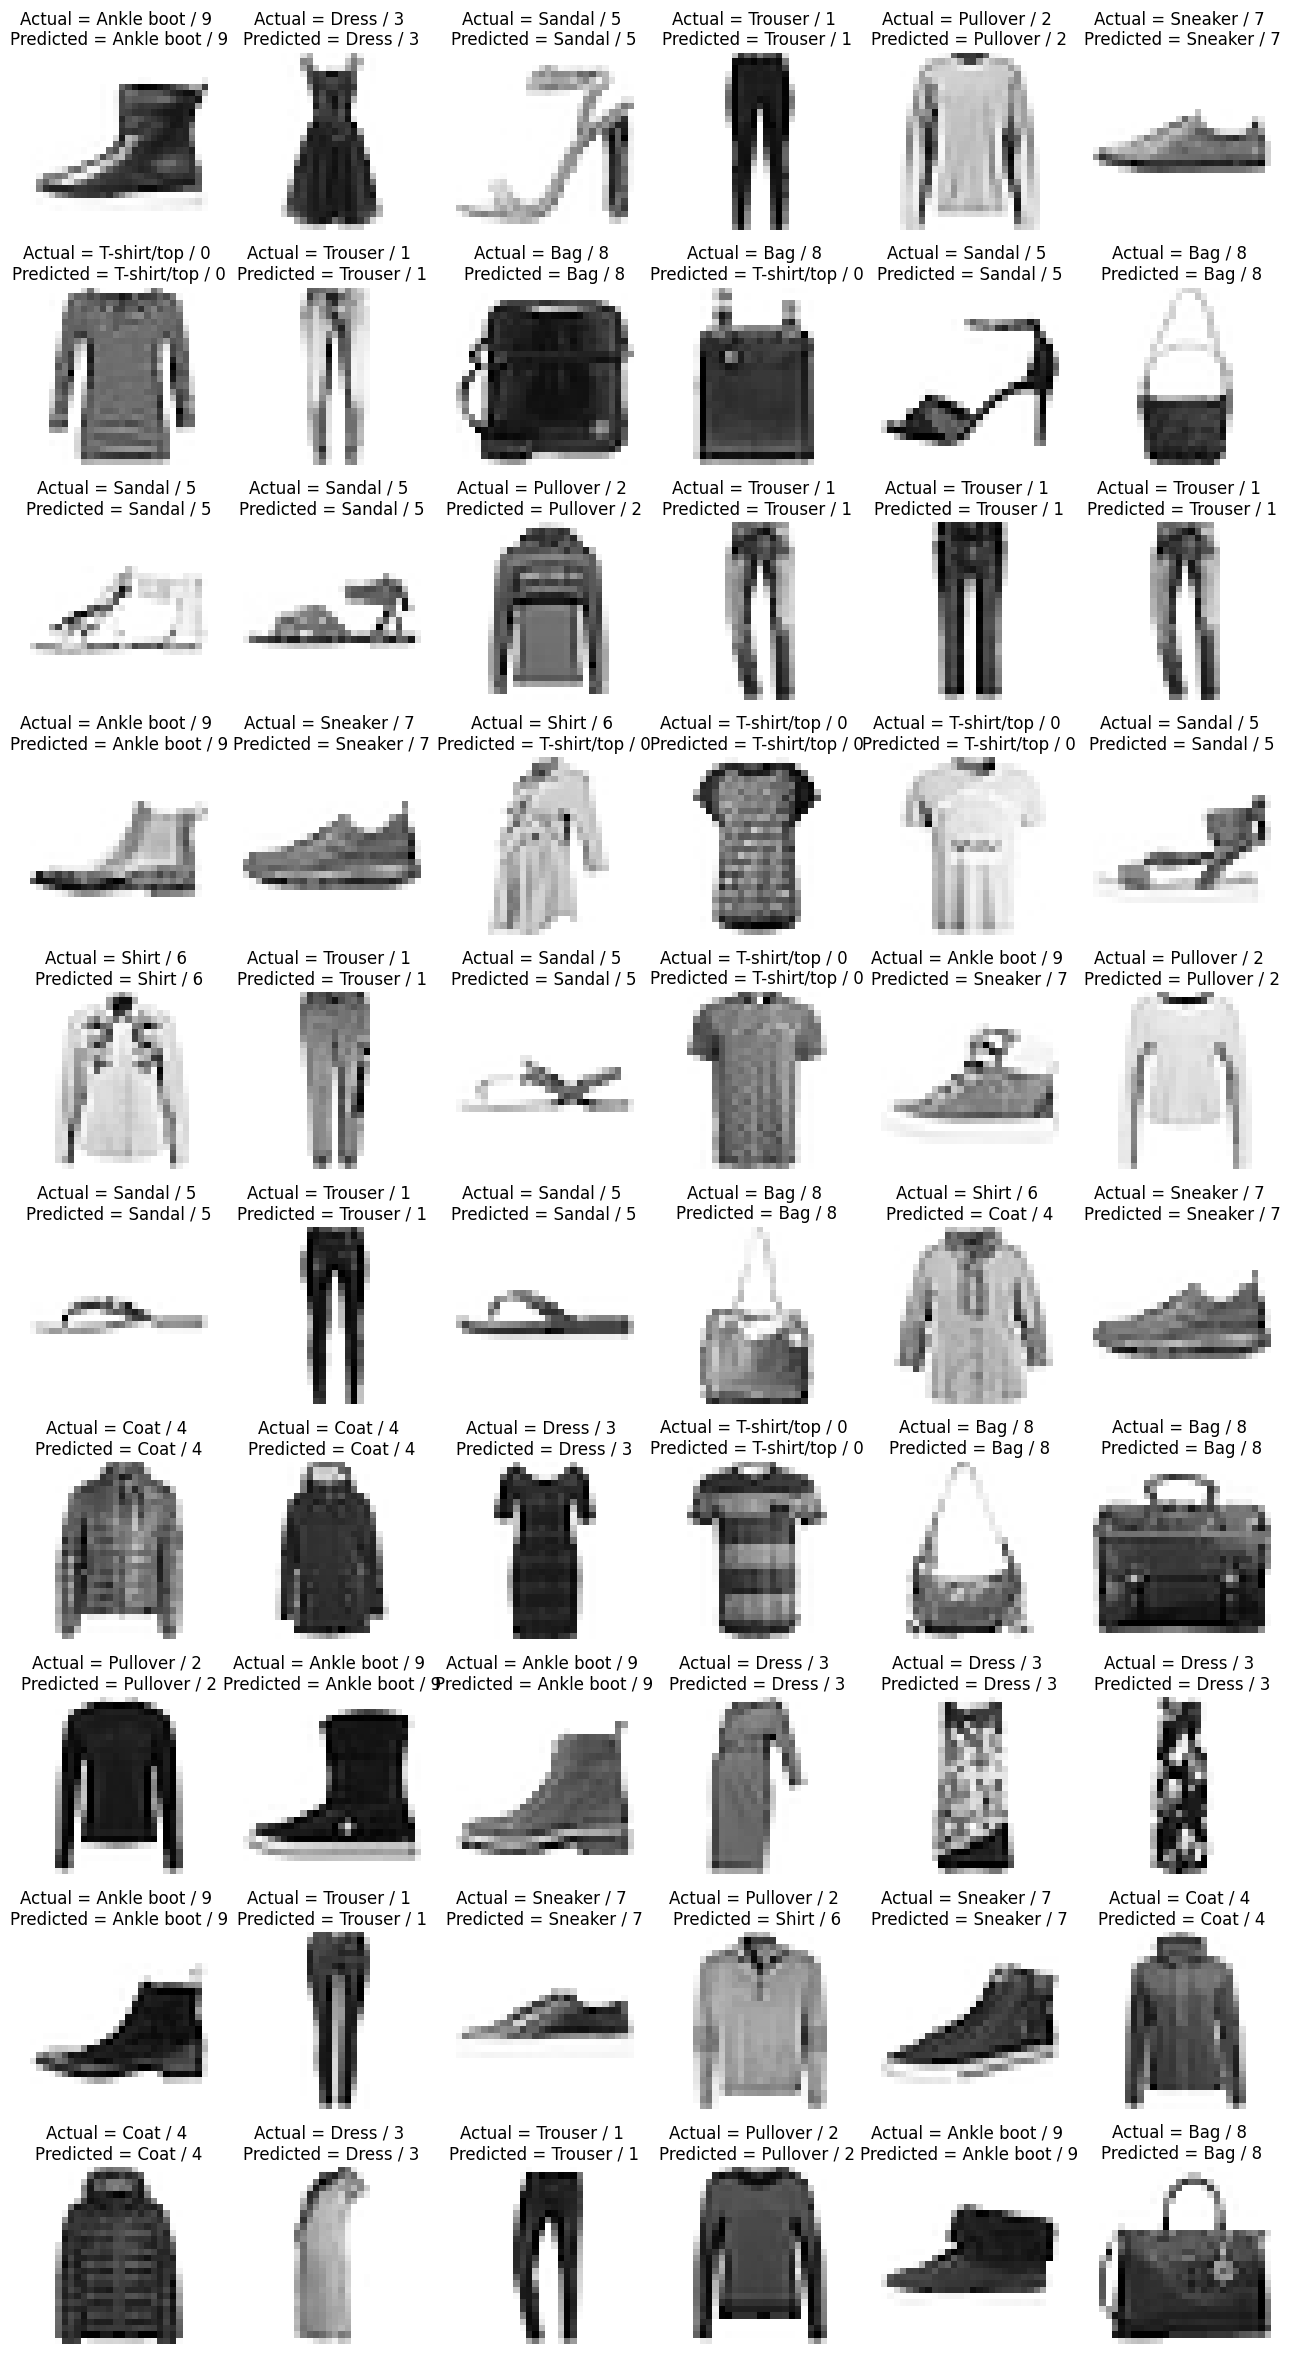

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j)
  j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

<Axes: >

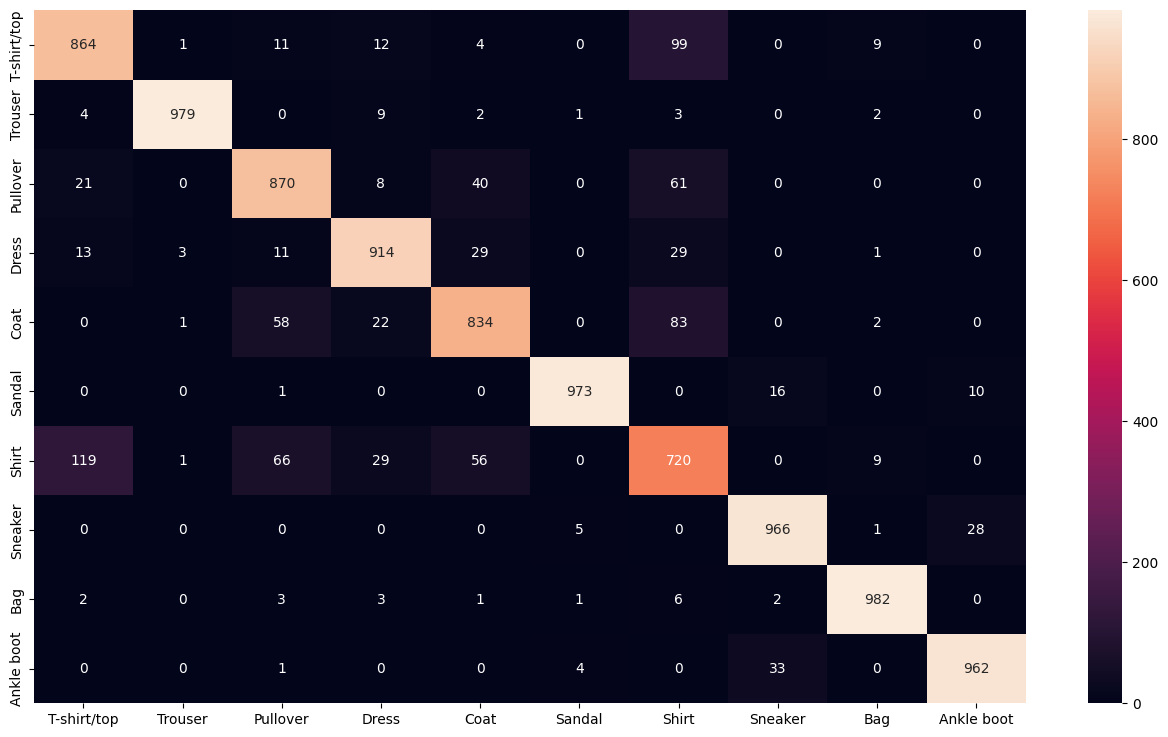

In [ ]:
from sklearn.metrics import confusion_matrix#Evaluate the model

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

# show cm
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [ ]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.86      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.85      0.87      0.86      1000
       Dress       0.92      0.91      0.92      1000
        Coat       0.86      0.83      0.85      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.72      0.72      0.72      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
# Save model
cnn_model.save('fashion_mnist_cnn_model.h5')

In [ ]:
# Load model
fashion_mnist_cnn_model = tf.keras.models.load_model('fashion_mnist_cnn_model.h5')

In [ ]:
Y_pred_sample = fashion_mnist_cnn_model.predict(np.expand_dims(X_test[0], axis=0)).round(2)
np.argmax(Y_pred_sample[0])

1/1 [==============================] - 0s 96ms/step


9

In [ ]:
y_test[0]

9